13/13 [==============================] - 0s 750us/step


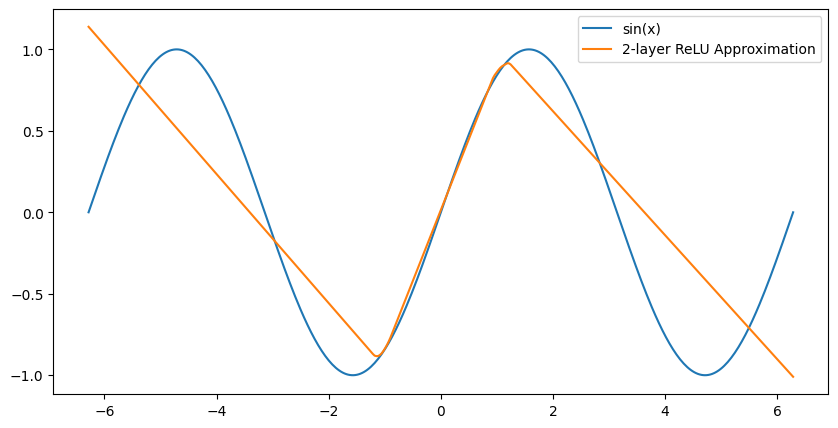

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.sin(x)

model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x, y, epochs=50, batch_size=10, verbose=0)
y_pred = model.predict(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='sin(x)')
plt.plot(x, y_pred, label='2-layer ReLU Approximation')
plt.legend()
plt.show()